# 실습 3: Principal Axes, Eigen Face Continued (2023.10.04)
### 빅데이터수치해석 입문 및 실습 
### 숙명여자대학교 기계시스템학부 심주용

- Reference: [Data-Driven Science and Engineering](https://www.databookuw.com/) by Steven L. Brunton, J. Nathan Kutz

##  Principal Axes: Noisy Cloud Data with an angle of 60$^{\circ}$

In this example, we aim to create random data with a variance of 4 (standard deviation, 2) along the 60-degree axis and a variance of 0.25 (standard deviation, 0.5) along the 150-degree axis. We then use principal component analysis to verify the principal axis transformation.

First, let's create 10,000 points for the x and y coordinates with a mean of 0 and a variance of 1 using the **np.random.randn function**.

To stretch this data by a factor of 2 along the x-axis and 0.5 along the y-axis, we multiply it by the following diagonal matrix:
$\begin{bmatrix}
2 & 0\\
0 & 0.5
\end{bmatrix}$.

Next, to rotate the data by an angle of 60 degrees, we multiply it by the rotation matrix $R_{\pi/3}, i.e., R_{60^{\circ}}$ =
$\begin{bmatrix}
cos(60^{\circ}) & -sin(60^{\circ})  \\
sin(60^{\circ})  & cos(60^{\circ}) 
\end{bmatrix}$
=
$\begin{bmatrix}
1/2 & -\sqrt3/2 \\
\sqrt3/2 & 1/2
\end{bmatrix}$.

Lastly, to move the center from (0,0) to (2,1), we add (2,1).


As a result, the following operation is applied to (x,y).
$\begin{bmatrix}
cos(60^{\circ}) & -sin(60^{\circ})  \\
sin(60^{\circ})  & cos(60^{\circ}) 
\end{bmatrix}$
$\begin{bmatrix}
2 & 0\\
0 & 0.5
\end{bmatrix}$
$\begin{bmatrix}
x\\
y
\end{bmatrix}$
+
$\begin{bmatrix}
2\\
1
\end{bmatrix}$

Lastly, we use it to plot confidence intervals using multiple standard deviations.


- $\cos(17t)\exp(-t^2)$ and $\sin(5t)\exp(-t^2)$ 
- $\cos{17t}\exp{-t^2}$ and $\sin{5t}\exp{-t^2}$ 

In [ ]:
fig1,ax1 = plt.subplots(131)

ax1.semilogy(S,'-o', color='k', lw=2)
ax1.semilogy(np.diag(S[:(r+1)]),'o', color='r', lw=2)
ax1.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', lw=2)
rect = patches.Rectangle((-5,20),100,200,lw=2,linestyle='--',facecolor='none',edgecolor='k')
ax1.add_patch(rect)
plt.xlim((-10,610))
plt.ylim((0.003,300))
ax1.grid()
plt.show()

fig2,ax2 = plt.subplots(1)

ax2.semilogy(S,'-o', color='k', lw=2)
ax2.semilogy(np.diag(S[:(r+1)]),'o', color='r', lw=2)
ax2.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', lw=2)
plt.xlim((-5,100))
plt.ylim((20,200))
ax2.grid()
plt.show()

fig3,ax3 = plt.subplots(1)
ax3.plot(cdS,'-o',color='k',lw=2)
ax3.plot(cdS[:(r90+1)],'o',color='b',lw=2)
ax3.plot(cdS[:(r+1)],'o',color='r',lw=2)
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90, r90, -10]),np.array([0, 0.9, 0.9]),'--',color='b',lw=2)

ax3.grid()
plt.show()



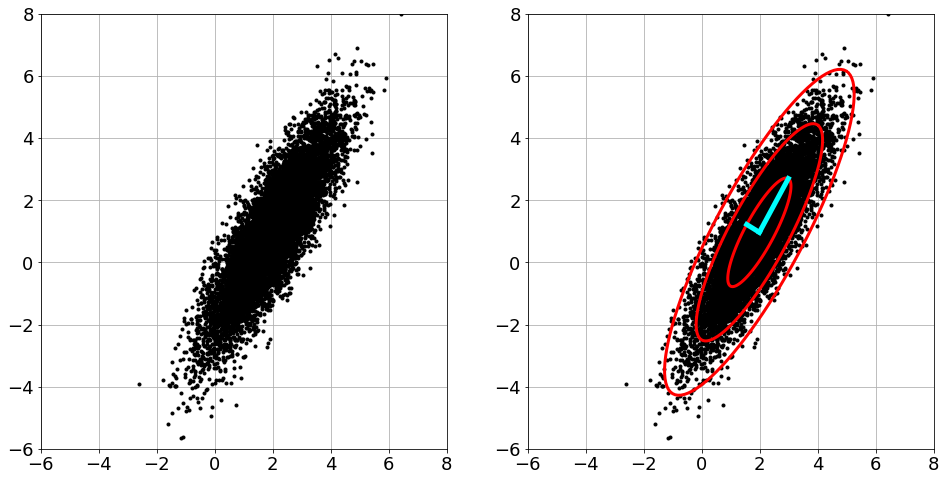

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = (R @ np.diag(sig) @ np.random.randn(nPoints,2).T).T + np.ones((nPoints,2)) @ np.diag(xC)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[:,0],X[:,1], 'k.')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

Xavg = np.mean(X,axis=0)                  # Compute mean
B = X - Xavg      # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints-1),full_matrices=False)

ax2 = fig.add_subplot(122)
ax2.plot(X[:,0],X[:,1], 'k.')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)
Rp = VT.T
# 1-std confidence interval
Xstd = Rp @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',lw=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',lw=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',lw=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+Rp[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+Rp[1,0]*S[0]]),'-',color='cyan',lw=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+Rp[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+Rp[1,1]*S[1]]),'-',color='cyan',lw=5)

plt.show()

## Eigen Face Continued

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat('allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])].T
avgFace = np.mean(trainingFaces, axis=0) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - avgFace
U, S, VT = np.linalg.svd(X,full_matrices=False)

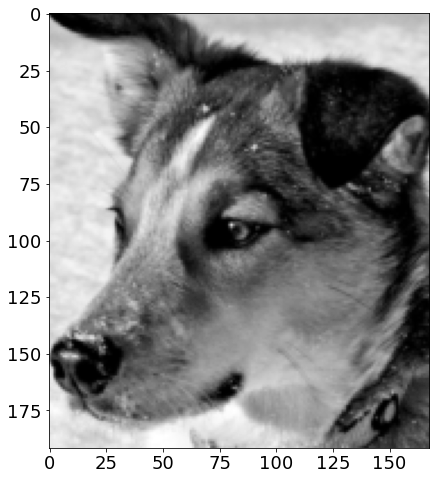

In [57]:
from matplotlib.image import imread
from skimage.transform import resize

img = imread(os.path.join('dog.jpg'))
img = img.mean(-1) # Convert RGB to grayscale
img = resize(img,(400,300))[30:30+n,20:20+m]
plt.imshow(img, cmap='gray')

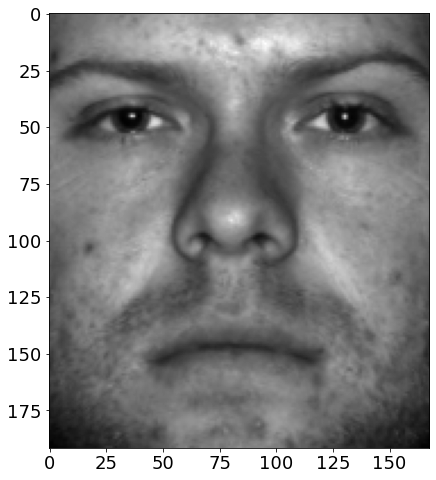

In [66]:
plt.imshow(faces[:,0].reshape((m,n)).T, cmap='gray')

In [64]:
testFace = img.T.reshape((m*n))
testFace.shape

(32256,)

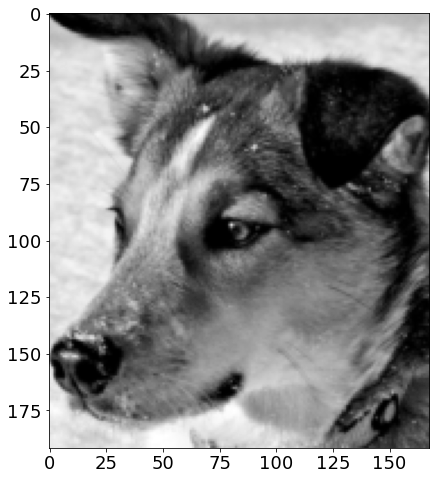

In [65]:
plt.imshow(testFace.reshape((m,n)).T, cmap='gray')

In [69]:
VT.shape

(2282, 32256)

In [72]:
U.shape, S.shape, VT.shape, X.shape

((2282, 2282), (2282,), (2282, 32256), (2282, 32256))

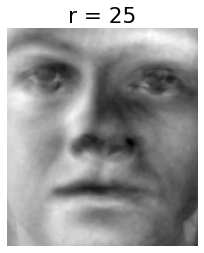

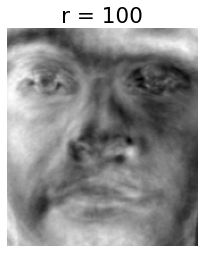

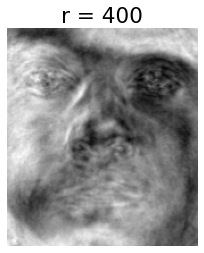

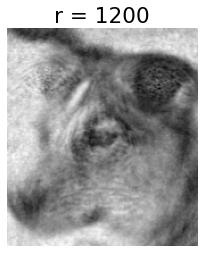

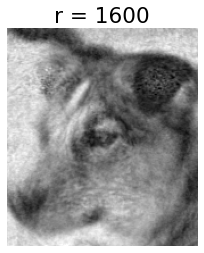

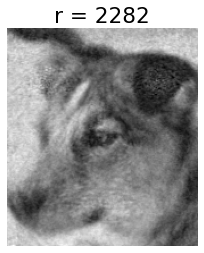

In [71]:
testFaceMS = testFace - avgFace
r_list = [25, 100, 400, 1200, 1600, 2282]

plt.rcParams['figure.figsize'] = [4, 4]

for r in r_list:
    Z_r = testFaceMS @ VT[:r,:].T # r principal components (# = r)
    reconFace = avgFace + Z_r @ VT[:r,:] # reconstruction using r eigen faces and r principal components
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

In [73]:
U, S, VT = np.linalg.svd(X,full_matrices=True)

In [74]:
U.shape, S.shape, VT.shape, X.shape

((2282, 2282), (2282,), (32256, 32256), (2282, 32256))

In [75]:
np.save('eigenface_VT.npy',VT)

In [76]:
np.save('eigenface_U.npy',U)
np.save('eigenface_S.npy',S)

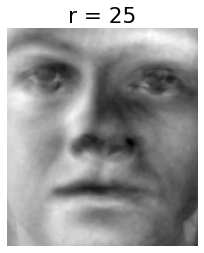

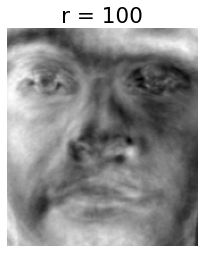

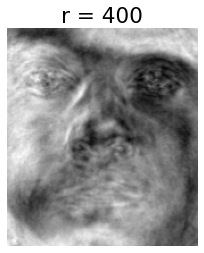

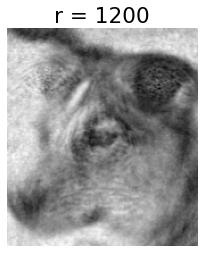

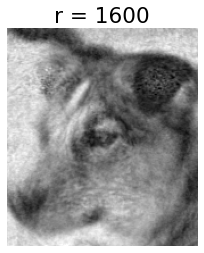

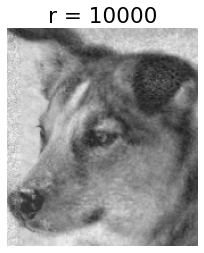

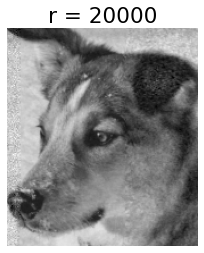

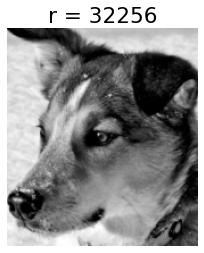

In [80]:
testFaceMS = testFace - avgFace
r_list = [25, 100, 400, 1200, 1600, 10000, 20000, 32256]

plt.rcParams['figure.figsize'] = [4, 4]

for r in r_list:
    Z_r = testFaceMS @ VT[:r,:].T # r principal components (# = r)
    reconFace = avgFace + Z_r @ VT[:r,:] # reconstruction using r eigen faces and r principal components
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

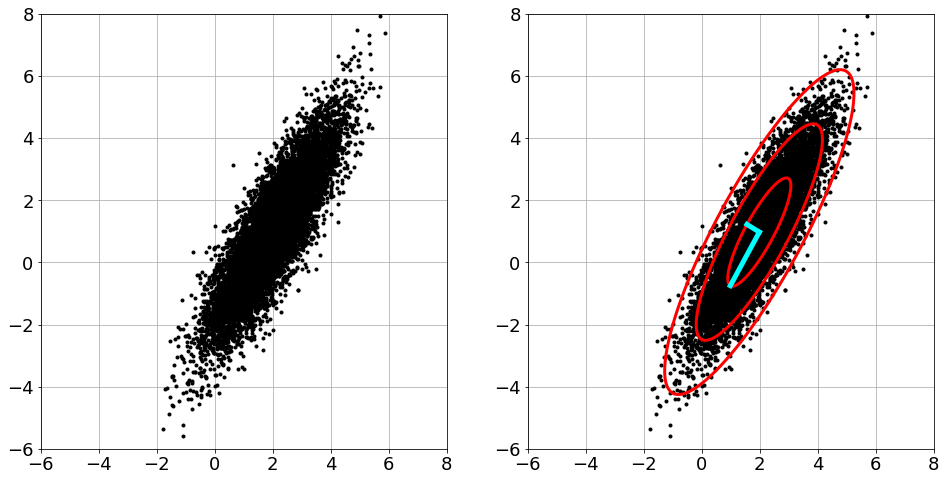

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], 'k.')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], 'k.')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',lw=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',lw=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',lw=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',lw=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',lw=5)

plt.show()

# 실습 3: Principal Axes (2023.10.04)
### 빅데이터수치해석 입문 및 실습 
### 숙명여자대학교 기계시스템학부 심주용

- Reference: [Data-Driven Science and Engineering](https://www.databookuw.com/) by Steven L. Brunton, J. Nathan Kutz

##  Noisy Cloud Data with an angle of 60$^{\circ}$

A noisy cloud of data is generated by selecting 10,000 vectors from a two-dimensional normal distribution with zero mean and unit variance. These vectors are then scaled in the x and y directions by the rotatation matrix with an angle of $pi/3$. Finally, the entire cloud of data is translated so that it has a nonzero center $X_c = [2, 1]^T$

Let's perform PCA and use it to plot confidence intervals using multiple standard deviations.

이번 예제에서는 각도 60도 축으로 분산이 표준편차가 2, 각도 150도 축으로 분산이 0.5인 random 데이터를 만들어서 주성분 분석을 통해서 주축 변환을 확인해보고자 합니다.

First, let's create 10,000 points for the x and y coordinates with a mean of 0 and a variance of 1 using the np.random.randn function.


이 데이터를 x축으로 2배, y축으로 0.5배 늘리기 위해서 다음 diagonal matrix
$\begin{bmatrix}
2 & 0\\
0 & 0.5
\end{bmatrix}$
를 곱해봅시다.

그리고 나서 60도 각도로 회전시키기 위해서 rotation matrix ($R_{\pi/3}$) i.e., $R_{60^{\circ}}$=
$\begin{bmatrix}
cos(60^{\circ}) & -sin(60^{\circ})  \\
sin(60^{\circ})  & cos(60^{\circ}) 
\end{bmatrix}$
=
$\begin{bmatrix}
1/2 & -\sqrt3/2 \\
\sqrt3/2 & 1/2
\end{bmatrix}$
를 곱합니다.

마지막으로 중심을 (0,0)에서 (2,1)로 옮기기 위해서 (2,1)을 더해줍니다.

결과적으로 (x,y)에 대해서 다음과 같은 연산을 해주게 됩니다.
$\begin{bmatrix}
cos(60^{\circ}) & -sin(60^{\circ})  \\
sin(60^{\circ})  & cos(60^{\circ}) 
\end{bmatrix}$
$\begin{bmatrix}
2 & 0\\
0 & 0.5
\end{bmatrix}$
$\begin{bmatrix}
x\\
y
\end{bmatrix}$
+
$\begin{bmatrix}
2\\
1
\end{bmatrix}$


# 실습 3: Principal Axes (2023.10.04)
### 빅데이터수치해석 입문 및 실습 
### 숙명여자대학교 기계시스템학부 심주용

- Reference: [Data-Driven Science and Engineering](https://www.databookuw.com/) by Steven L. Brunton, J. Nathan Kutz

##  Noisy Cloud Data with an angle of 60$^{\circ}$

A noisy cloud of data is generated by selecting 10,000 vectors from a two-dimensional normal distribution with zero mean and unit variance. These vectors are then scaled in the x and y directions by the rotatation matrix with an angle of $pi/3$. Finally, the entire cloud of data is translated so that it has a nonzero center $X_c = [2, 1]^T$

Let's perform PCA and use it to plot confidence intervals using multiple standard deviations.

먼저 np.random.randn 함수를 사용해서 x, y에 좌표에 대해서 10000개의 포인트를 평균 0, 분산 1이 되도록 만들어 봅시다.

이 데이터를 x축으로 2배, y축으로 0.5배 늘리기 위해서 다음 diagonal matrix
$\begin{bmatrix}
2 & 0\\
0 & 0.5
\end{bmatrix}$
를 곱해봅시다.

그리고 나서 60도 각도로 회전시키기 위해서 rotation matrix ($R_{\pi/3}$) i.e., $R_{60^{\circ}}$=
$\begin{bmatrix}
cos(60^{\circ}) & -sin(60^{\circ})  \\
sin(60^{\circ})  & cos(60^{\circ}) 
\end{bmatrix}$
=
$\begin{bmatrix}
1/2 & -\sqrt3/2 \\
\sqrt3/2 & 1/2
\end{bmatrix}$
를 곱합니다.

마지막으로 중심을 (0,0)에서 (2,1)로 옮기기 위해서 (2,1)을 더해줍니다.

결과적으로 (x,y)에 대해서 다음과 같은 연산을 해주게 됩니다.
$\begin{bmatrix}
cos(60^{\circ}) & -sin(60^{\circ})  \\
sin(60^{\circ})  & cos(60^{\circ}) 
\end{bmatrix}$
$\begin{bmatrix}
2 & 0\\
0 & 0.5
\end{bmatrix}$
$\begin{bmatrix}
x\\
y
\end{bmatrix}$
+
$\begin{bmatrix}
2\\
1
\end{bmatrix}$


# 실습 3: Principal Axes (2023.10.04)
### 빅데이터수치해석 입문 및 실습 
### 숙명여자대학교 기계시스템학부 심주용

- Reference: [Data-Driven Science and Engineering](https://www.databookuw.com/) by Steven L. Brunton, J. Nathan Kutz

##  Noisy Cloud Data with an angle of 60$^{\circ}$

A noisy cloud of data is generated by selecting 10,000 vectors from a two-dimensional normal distribution with zero mean and unit variance. These vectors are then scaled in the x and y directions by the rotatation matrix with an angle of $pi/3$. Finally, the entire cloud of data is translated so that it has a nonzero center $X_c = [2, 1]^T$

Let's perform PCA and use it to plot confidence intervals using multiple standard deviations.

먼저 10000개의 포인트를 x, y에 대해서 평균 0, 분산 1이 되도록 만들기 위해 np.random.randn 함수를 사용해봅시다.

이 데이터를 x축으로 2배, y축으로 0.5배 늘리기 위해서 다음 diagonal matrix
$\begin{bmatrix}
2 & 0\\
0 & 0.5
\end{bmatrix}$
를 곱해봅시다.

그리고 나서 60도 각도로 회전시키기 위해서 rotation matrix ($R_{\pi/3}$) i.e., $R_{60^{\circ}}$=
$\begin{bmatrix}
cos(60^{\circ}) & -sin(60^{\circ})  \\
sin(60^{\circ})  & cos(60^{\circ}) 
\end{bmatrix}$
=
$\begin{bmatrix}
1/2 & -\sqrt3/2 \\
\sqrt3/2 & 1/2
\end{bmatrix}$
를 곱합니다.

마지막으로 중심을 (0,0)에서 (2,1)로 옮기기 위해서 (2,1)을 더해줍니다.

결과적으로 (x,y)에 대해서 다음과 같은 연산을 해주게 됩니다.
$\begin{bmatrix}
cos(60^{\circ}) & -sin(60^{\circ})  \\
sin(60^{\circ})  & cos(60^{\circ}) 
\end{bmatrix}$
$\begin{bmatrix}
2 & 0\\
0 & 0.5
\end{bmatrix}$
$\begin{bmatrix}
x\\
y
\end{bmatrix}$
+
$\begin{bmatrix}
2\\
1
\end{bmatrix}$


$\begin{bmatrix}
\frac{1]{2} & \frac{1]{2} \\
\frac{1]{2}  & \frac{1]{2} 
\end{bmatrix}$

$\frac{1}{2}$

$\begin{bmatrix}
1 & 2 & 3\\
a & b & c
\end{bmatrix}$





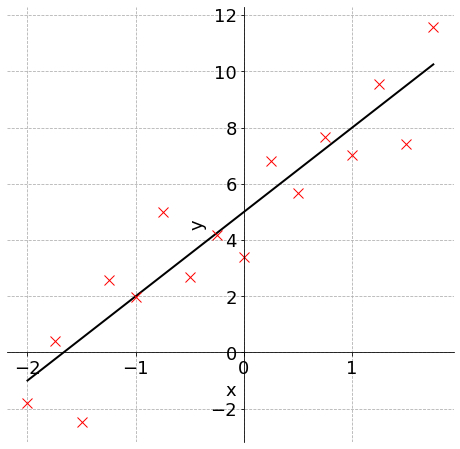

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

a = 3 # True slope
b = 5
x = np.arange(-2,2,0.25)
x = x.reshape(-1, 1)
y = a*x + b + np.random.randn(*x.shape) # Add noise
# y = a*x + np.random.randn(x.shape[0],x.shape[1])

fig, ax = plt.subplots()
ax.plot(x, a*x+b, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements
ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


In [2]:
A = np.concatenate((x,np.ones(x.shape)),axis=1)
A

array([[-2.  ,  1.  ],
       [-1.75,  1.  ],
       [-1.5 ,  1.  ],
       [-1.25,  1.  ],
       [-1.  ,  1.  ],
       [-0.75,  1.  ],
       [-0.5 ,  1.  ],
       [-0.25,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.25,  1.  ],
       [ 0.5 ,  1.  ],
       [ 0.75,  1.  ],
       [ 1.  ,  1.  ],
       [ 1.25,  1.  ],
       [ 1.5 ,  1.  ],
       [ 1.75,  1.  ]])

In [3]:
y

array([[-1.7847429 ],
       [ 0.40342172],
       [-2.47699439],
       [ 2.56905289],
       [ 1.95658166],
       [ 4.98838835],
       [ 2.7004775 ],
       [ 4.17548611],
       [ 3.38700796],
       [ 6.8050338 ],
       [ 5.67797614],
       [ 7.65886702],
       [ 7.0290902 ],
       [ 9.54839918],
       [ 7.41742696],
       [11.59161606]])

In [4]:
A = np.concatenate((x,np.ones(x.shape)),axis=1)
B = y

U, S, VT = np.linalg.svd(A,full_matrices=False)
pinv = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ B # Least-square fit
pinv

array([[3.05374262],
       [4.85966084]])

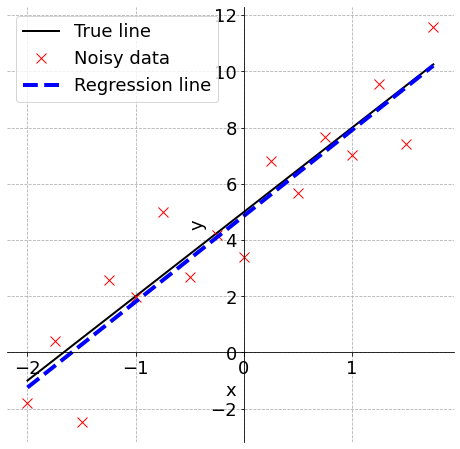

In [5]:
fig, ax = plt.subplots()

ax.plot(x, a*x+b, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements

ax.plot(x,pinv[0] * x + pinv[1],'--',color='b',linewidth=4, label='Regression line')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.legend()
plt.show()

In [6]:
# Methods of computing regression
atilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ B
atilde2 = np.linalg.pinv(A) @ B

print('pseudo inverse by svd:')
print(atilde1)
print('left pseudo inverse:')
print(atilde2)

pseudo inverse by svd:
[[3.05374262]
 [4.85966084]]
left pseudo inverse:
[[3.05374262]
 [4.85966084]]


In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(A, B)
reg.coef_, reg.intercept_

(array([[3.05374262, 0.        ]]), array([4.85966084]))